In [63]:
import matplotlib.pyplot as plt
import tifffile as tiff
import skimage.morphology as morph 
from skimage.filters import rank

In [64]:
# Załadowanie pliku .tiff
img_a = tiff.imread("src/cboard_pepper_only.tif") 
img_b = tiff.imread("src/cboard_salt_only.tif") 
img_c = tiff.imread("src/cboard_salt_pepper.tif") 

In [65]:
def meanFilter(img):
    plt.subplot(2,3,2)
    mean_img = rank.mean(img,morph.footprint_rectangle((3,3)))    
    plt.imshow(mean_img)
    plt.title("Filtr uśredniający")

In [66]:
def mediFilter(img):
    plt.subplot(2,3,3)
    medi_img = rank.median(img,morph.footprint_rectangle((3,3)))
    plt.imshow(medi_img)
    plt.title("Filtr medianowy")

In [67]:
def minMaxFilter(img):
    plt.subplot(2,3,4)
    min_img = rank.minimum(img,morph.footprint_rectangle((3,3)))
    plt.imshow(min_img)
    plt.title("Filtr min")
    
    plt.subplot(2,3,5)
    max_img = rank.maximum(img,morph.footprint_rectangle((3,3)))
    plt.imshow(max_img)
    plt.title("Filtr maks")


    plt.subplot(2,3,6)
    minMax_img = rank.maximum(min_img,morph.footprint_rectangle((3,3)))
    plt.imshow(minMax_img)
    plt.title("Filtr min-maks")



In [68]:
def display(img):
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Obraz Orginalny")
    meanFilter(img)
    mediFilter(img)
    minMaxFilter(img)
    plt.tight_layout()
    plt.show()

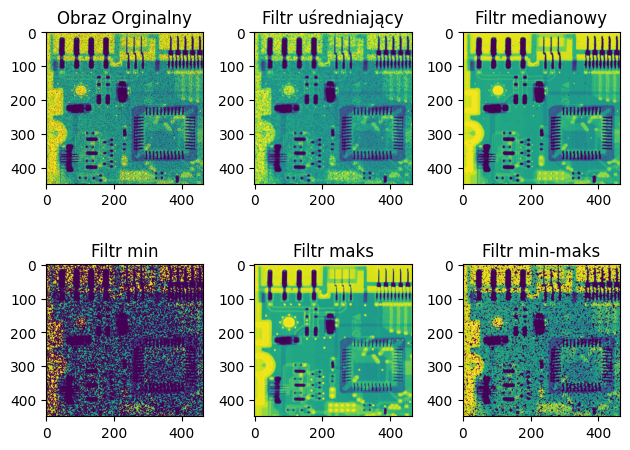

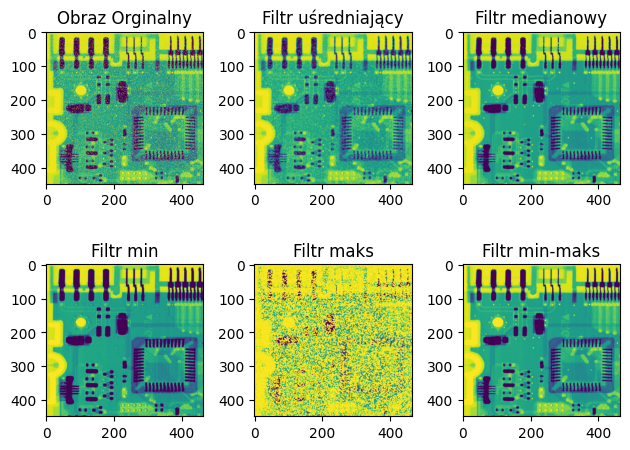

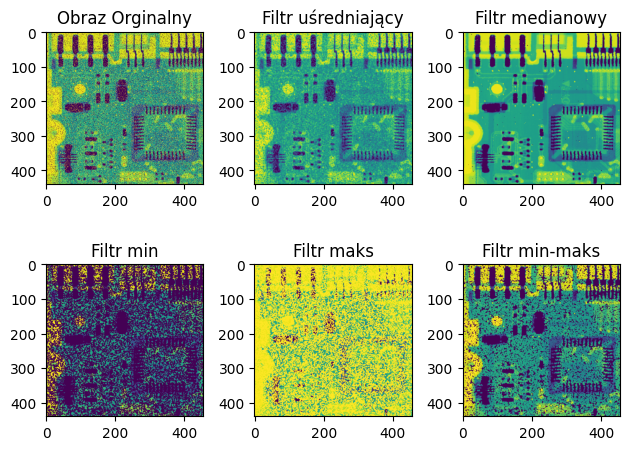

In [69]:
display(img_a)
display(img_b)
display(img_c)